# Extract data from https://lyrics.fandom.com/

Reload the kernel:

In [1]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# 1. [LyricsFandom](https://github.com/arthurdjn/scrape-lyricswiki): a python package to scrape music data

Import ``lyricsfandom`` package:

In [ ]:
!pip install lyricsfandom

In [2]:
from lyricsfandom import LyricWiki  # API
from lyricsfandom.music import Artist, Album, Song  # For custom usage

Create an instance; and set global parameters:
* verbose (bool): if ``True``, will display a log at each connection.
* sleep (float): number of seconds to wait between each connection.
* user (string): user agent used to connect. 

In [3]:
wiki = LyricWiki(verbose=False, sleep=0)

Search ``Artist``, ``Album``, ``Song`` with:
* ``lyricwiki.search_artist(ARTIST_NAME)``
* ``lyricwiki.search_album(ARTIST_NAME, ALBUM_NAME)``
* ``lyricwiki.search_song(ARTIST_NAME, SONG_NAME)``

This will create an instance of the desired object.

In [4]:
ARTIST_NAME = 'daughter'
artist = wiki.search_artist(ARTIST_NAME)

artist

Artist: Daughter

In [5]:
ALBUM_NAME = 'if you leave'
album = wiki.search_album(ARTIST_NAME, ALBUM_NAME)

album

Daughter: Album "If You Leave" (2013), Songs: 12

In [6]:
SONG_NAME = 'smoke'
song = wiki.search_song(ARTIST_NAME, ALBUM_NAME)

song

Daughter: "If You Leave"

If you want to scrape directly in a **JSON** format, you can use:
* ``lyricwiki.get_artist(ARTIST_NAME)``
* ``lyricwiki.get_albums(ARTIST_NAME)``
* ``lyricwiki.get_songs(ARTIST_NAME)``
* ``lyricwiki.get_lyrics(ARTIST_NAME)``

***

You can also use the core classes ``Artist``, ``Album``, ``Song`` directly:

In [7]:
artist = Artist(ARTIST_NAME)

artist

Artist: Daughter

In [8]:
album = Album(ARTIST_NAME, ALBUM_NAME)

album

Daughter: "If You Leave"

In [9]:
song = Song(ARTIST_NAME, SONG_NAME)

song

Daughter: "Smoke"

In [10]:
lyrics = song.get_lyrics()

print(lyrics)

In a smoke filled room
With your father watching me
There's three doors and no keys
It's rising, it's choking me

In a smoke filled room
In a smoke filled room

There's a man with no face
Just a blurred out portrait, in a photo frame
I'm losing again, I'm losing my friend
He's face down on the pavement

Then a woman, she screams, it's a terrible night
As the mood changes to dark from light
Tell the doctor what's become of me
So you can analyse, analyse my dreams

Of a smoke filled room
Of a smoke filled room
Of a smoke filled room

Then we kiss and his lips turn into sand
And the whole of him cascades through my hands
Making a castle on the floor
Then I'm alone again
No keys and three doors
In a smoke filled room

Now we're both in the room, and we're breathing the fumes
No doors this time, just a gap in the roof
Light floods in, heaven, we're blind
And slowly suffocating, we're dying

In a smoke filled room
We're dying in a smoke filled room
We're dying in a smoke filled room
(In a sm

# 2. Interaction between classes

You can retrieve information and data from each classes (from parent to children and the other way).

The structure is describe as follows:

* ``class Artist:``
* ``class Album:`` inherits from Artist
* ``class Song:`` inherits from Album

However, this structure is partially shared (through an abstract skeleton), so not all attributes and methods are inherited.

In [11]:
artist = Artist(ARTIST_NAME)
artist

Artist: Daughter

In [12]:
albums = artist.get_albums()
albums

[Daughter: EP "His Young Heart" (2011), Songs: 4,
 Daughter: EP "The Wild Youth" (2011), Songs: 4,
 Daughter: Album "If You Leave" (2013), Songs: 12,
 Daughter: Album "Not To Disappear" (2016), Songs: 11,
 Daughter: Album "Music From Before The Storm" (2017), Songs: 13,
 Daughter: Single "Other Songs", Songs: 1]

In [13]:
album = albums[2]

songs = album.get_songs()
songs

[Daughter: "Winter", from "If You Leave" (2013),
 Daughter: "Smother", from "If You Leave" (2013),
 Daughter: "Youth", from "If You Leave" (2013),
 Daughter: "Still", from "If You Leave" (2013),
 Daughter: "Lifeforms", from "If You Leave" (2013),
 Daughter: "Tomorrow", from "If You Leave" (2013),
 Daughter: "Human", from "If You Leave" (2013),
 Daughter: "Touch", from "If You Leave" (2013),
 Daughter: "Amsterdam", from "If You Leave" (2013),
 Daughter: "Shallows", from "If You Leave" (2013),
 Daughter: "Smoke", from "If You Leave" (2013),
 Daughter: "Drift", from "If You Leave" (2013)]

In [14]:
song = songs[-2]

lyrics = song.get_lyrics()
print(lyrics)

In a smoke filled room
With your father watching me
There's three doors and no keys
It's rising, it's choking me

In a smoke filled room
In a smoke filled room

There's a man with no face
Just a blurred out portrait, in a photo frame
I'm losing again, I'm losing my friend
He's face down on the pavement

Then a woman, she screams, it's a terrible night
As the mood changes to dark from light
Tell the doctor what's become of me
So you can analyse, analyse my dreams

Of a smoke filled room
Of a smoke filled room
Of a smoke filled room

Then we kiss and his lips turn into sand
And the whole of him cascades through my hands
Making a castle on the floor
Then I'm alone again
No keys and three doors
In a smoke filled room

Now we're both in the room, and we're breathing the fumes
No doors this time, just a gap in the roof
Light floods in, heaven, we're blind
And slowly suffocating, we're dying

In a smoke filled room
We're dying in a smoke filled room
We're dying in a smoke filled room
(In a sm

...and from a specific object, you can have access to the parent class:

In [15]:
song.get_album()

Daughter: Album "If You Leave" (2013), Songs: 12

In [16]:
song.get_artist()

Artist: Daughter

In [17]:
album.get_artist()

Artist: Daughter

You can also add new songs, albums if some of them are missing:

In [18]:
album_new = Album(ARTIST_NAME, 'Another Album')
artist.add_album(album_new)

In [19]:
artist.get_albums()

[Daughter: EP "His Young Heart" (2011), Songs: 4,
 Daughter: EP "The Wild Youth" (2011), Songs: 4,
 Daughter: Album "If You Leave" (2013), Songs: 12,
 Daughter: Album "Not To Disappear" (2016), Songs: 11,
 Daughter: Album "Music From Before The Storm" (2017), Songs: 13,
 Daughter: Single "Other Songs", Songs: 1,
 Daughter: "Another Album"]

In [20]:
song_new = Song(ARTIST_NAME, 'Another Song')
album_new.add_song(song_new)

D:\home\Arthur\Documents\Informatique\GitHub\scrape-lyricwiki\lyricfandom\music\album.py:134: RuntimeWarning: 
Invalid Names: Album name from "" does not match parent album Another Album. The song has been added, but you can change this behavior by setting the parameter `force=True` to update song's album information to its parent.
  warnings.warn(warn_msg, RuntimeWarning)


The warning message just tells that the song was previously linked to no albums. When you add somethinh to another instance, it will verifiy if the object you are adding is already related to another instance, and update everything.

In [21]:
song_new.get_album()

Daughter: "Another Album", Songs: 1

In [22]:
song_new.get_artist()

Artist: Daughter

In [23]:
artist.get_albums()

[Daughter: EP "His Young Heart" (2011), Songs: 4,
 Daughter: EP "The Wild Youth" (2011), Songs: 4,
 Daughter: Album "If You Leave" (2013), Songs: 12,
 Daughter: Album "Not To Disappear" (2016), Songs: 11,
 Daughter: Album "Music From Before The Storm" (2017), Songs: 13,
 Daughter: Single "Other Songs", Songs: 1,
 Daughter: "Another Album", Songs: 1]

# 3. Comparison with other packages

Basic import:

In [26]:
import matplotlib.pyplot as plt
import time

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.style.use('seaborn-darkgrid')
# Change the font ?
font = {'size'   : 15}
plt.rc('font', **font)

## 3.1. [PyLyrics3](https://github.com/jameswenzel/pylyrics3)

> Lyric scraper very loosely based on py-lyrics, updated for Python 3

In [27]:
import pylyrics3

In [28]:
start = time.time()

daughter_lyrics = pylyrics3.get_artist_lyrics('daughter')

time_pylyrics3 = time.time() - start
print(f"Time elapsed: {time_pylyrics3}")

Time elapsed: 10.503966331481934


## 3.2. [LyricsMaster](https://github.com/SekouD/lyricsmaster)

> LyricsMaster is a library for downloading lyrics from multiple lyrics providers.

In [29]:
from lyricsmaster import LyricWiki, TorController

provider = LyricWiki()

In [30]:
start = time.time()

discography = provider.get_lyrics('daughter')

time_lyricsmaster = time.time() - start
print(f"Time elapsed: {time_lyricsmaster}")

2020-05-21 21:52:35,939 WARNINGconnectionpool.py  274: Connection pool is full, discarding connection: lyrics.wikia.com
2020-05-21 21:52:36,306 WARNINGconnectionpool.py  274: Connection pool is full, discarding connection: lyrics.wikia.com
2020-05-21 21:52:36,640 WARNINGconnectionpool.py  274: Connection pool is full, discarding connection: lyrics.wikia.com


Time elapsed: 17.43413758277893


## 3.3. [LyricsFandom](https://github.com/arthurdjn/scrape-lyricswiki)

> Scrape music data from LyricWiki (https://lyrics.fandom.com). Artists, Albums, Songs can be extracted.

In [31]:
from lyricsfandom import LyricWiki

wiki = LyricWiki(verbose=False)

In [32]:
start = time.time()

lyrics = wiki.get_lyrics('Daughter', cover=False, other=False)

time_lyricwiki = time.time() - start
print(f"Time elapsed: {time_lyricwiki}")

Time elapsed: 15.401979923248291


## 3.4. Speed comparison

In [33]:
ARTISTS = [
    'Ex:Re',
    'Daughter', 
    'Julien Baker', 
    'Foals', 
    'Phoebe Bridgers', 
    'Billie Marten', 
    'Sóley', 
    'Agnes Obel', 
    'Fink', 
    'SoKo', 
    'Big Thief', 
    'Jess Williamson', 
    'Bon Iver', 
    'London Grammar',
    'The XX', 
    'Wolf Alice',
    'Sharon Van Etten',
    'Lorde',
    'Marika Hackman',
    'Lola Marsh',
    'Paloma Faith',
    'Local Natives',
    'Lykke Li',
    'Birdy',
    'Siv Jakobsen',
]

In [38]:
time_pylyrics3 = []
time_lyricsmaster = []
time_lyricwiki = []

In [40]:
artist_name = 'Ex:Re'
for _ in range(90):  
    start = time.time()
    lyrics = pylyrics3.get_artist_lyrics(artist_name)
    time_pylyrics3.append(time.time() - start)
    print('pylyrics:', time.time() - start)
    
    start = time.time()
    discography = provider.get_lyrics(artist_name)
    time_lyricsmaster.append(time.time() - start)
    print('lyricsmaster:', time.time() - start)

    start = time.time()
    lyrics = wiki.get_lyrics(artist_name)
    time_lyricwiki.append(time.time() - start)
    print('lyricwiki:', time.time() - start)
    print('-----------------')

pylyrics: 0.6276760101318359
lyricsmaster: 4.18030309677124
lyricwiki: 0.3098011016845703
-----------------
pylyrics: 0.20415949821472168
lyricsmaster: 3.893815279006958
lyricwiki: 0.33399105072021484
-----------------
pylyrics: 0.23291659355163574
lyricsmaster: 4.117064714431763
lyricwiki: 0.28302478790283203
-----------------
pylyrics: 0.17683100700378418
lyricsmaster: 3.987844467163086
lyricwiki: 0.3383333683013916
-----------------
pylyrics: 0.21234440803527832
lyricsmaster: 4.348703145980835
lyricwiki: 0.3814656734466553
-----------------
pylyrics: 0.20139217376708984
lyricsmaster: 3.867363929748535
lyricwiki: 0.33527350425720215
-----------------
pylyrics: 0.20982599258422852
lyricsmaster: 3.9674665927886963
lyricwiki: 0.34012460708618164
-----------------
pylyrics: 0.31386423110961914
lyricsmaster: 3.997500419616699
lyricwiki: 0.3078317642211914
-----------------
pylyrics: 0.522721529006958
lyricsmaster: 3.6506710052490234
lyricwiki: 0.3311290740966797
-----------------
pylyrics

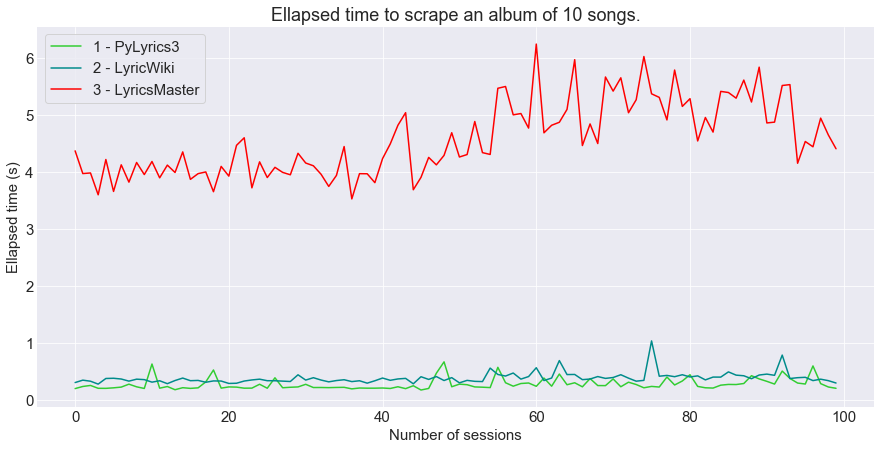

In [102]:
plt.subplots(figsize=(15, 7))

plt.plot(time_pylyrics3, color='limegreen', label='1 - PyLyrics3')
plt.plot(time_lyricwiki, color='darkcyan', label='2 - LyricWiki')
plt.plot(time_lyricsmaster, color='red', label='3 - LyricsMaster')

plt.title('Ellapsed time to scrape an album of 10 songs.')
plt.ylabel('Ellapsed time (s)')
plt.xlabel('Number of sessions')
plt.legend(frameon=True)